#Data Visualisasi Menggunakan Matplotlib

Study case manggunakan data retail

In [ ]:
import pandas as pd

dataset_retail = pd.read_csv("retail_raw_reduced.csv")
print("Ukuran dataset: %d baris dan %d kolom\n" % dataset_retail.shape)

print("Lima data teratas: ")
print(dataset_retail.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas: 
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


#Menambah Kolom Order Month untuk mempermudah visualisasi per Periode

In [ ]:
import datetime
dataset_retail['order_month'] = dataset_retail['order_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
print(dataset_retail.head())

   order_id  order_date  customer_id  ... quantity item_price order_month
0   1703458  2019-10-17        14004  ...       10     740000     2019-10
1   1706815  2019-10-24        17220  ...        2     604000     2019-10
2   1710718  2019-11-03        16518  ...        8    1045000     2019-11
3   1683592  2019-08-19        16364  ...        4     205000     2019-08
4   1702573  2019-10-16        15696  ...        2    4475000     2019-10

[5 rows x 10 columns]


Keterangan:
1. apply & lambda digunakan ketika membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x:x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya diproses agar menjadi monthnya saja
2. Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime
3. function strtime digunakan untuk mengubah format suatu data yang memiliki waktu berupa datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti outputnya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya tidak ada.

#Penambahan kolom GMV (item_price x quantity) pada Dataset

In [ ]:
dataset_retail['gmv'] = dataset_retail['item_price']*dataset_retail['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset_retail.shape)
print('Lima data teratas: ')
print(dataset_retail.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas: 
   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]


#Membuat Data Agregat


In [ ]:
jumlah_perbulan = dataset_retail.groupby('order_month')['gmv'].sum().reset_index()
print(jumlah_perbulan)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


#Membuat Line Chart Trend Pertumbuhan GMV

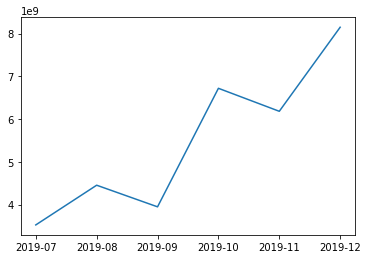

In [ ]:
#Cara 1

import matplotlib.pyplot as plt
plt.plot(jumlah_perbulan['order_month'], jumlah_perbulan['gmv'])
plt.show()

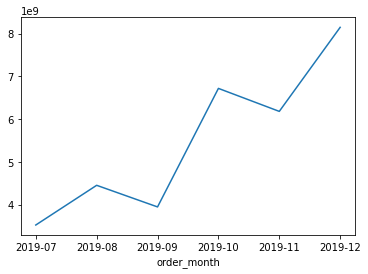

In [ ]:
#Cara 2

import matplotlib.pyplot as plt
dataset_retail.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

#Custom Plot

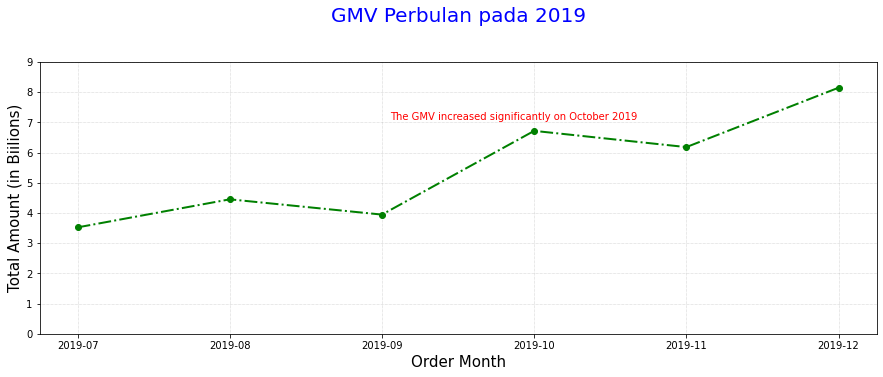

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset_retail.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('GMV Perbulan pada 2019', loc='center', pad='40', fontsize=20, color='blue')
plt.xlabel("Order Month", fontsize=15)
plt.ylabel('Total Amount (in Biilions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0) #batas grafik
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int)) 
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('gmv_perbulan.png', quality=95)
plt.show()

Keterangan:
1. **Figure** adalah keseluruhan visualisasi yang diplot dalam 1 kali menjalankan code
2. Satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut **Axes**. Sebuah figure dapat terdiri dari beberapa Axes.
3. **Axis label**: nama dari sumbu yang ditampilkan
4. **Tick**: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai
5. **Tick Label**: Tulisan di tiap tick yang menyatakan nilainya
6. **line** (untuk nilai plot), **marker** (untuk scatter plot), **bar** (untuk bar plot/histogram)
7. **Grid** untuk mempermudah melihat tick yang sejajar, **text** untuk memberikan informasi tambahan berbentuk teks di grafik
**Title dan Axis Labels**
8. **loc** untuk menentuka posisi title. 'Left' untuk membuat rata kiri, 'right' untuk rata kanan, dan 'center' untuk meletakkannya di tengah.
9. **pad** untuk menambahkan jarak antara judul ke grafik (dalam satuan px)
10. **color** untuk mengganti warna huruf judul. Bisa dengan hex string.
**Kustomisasi Line dan Point**
11. **color** untuk mengubah warna
12. **linewidth** untuk mengubah ketebalan line/garis (dalam satuan px)
13. **linestyle** mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus, '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau 'dashdot' untuk garis dan titik bergantian,
14. **marker** untuk mengubah tipe points/titik data di chart. Bisa menggunakan '.' untuk bulatan kecil/titik, 'o' untuk bulatan agak keras, 's' untuk persegi, 'D' untuk diamond/wajik, '+', 'x', '|', '*'.
**Parameter untuk Menyimpan Gambar**
15. **dpi** untuk resolusi gambar (dots per inch)
16. **quality** untuk kualitas gambar (hanya berlaku jika format gambar jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus)
17. **facecolor** untuk memberikan warna bagian depan figure, di luar area plot
18. **edgecolor** untuk memberikan warna pinggiran gambar
19. **transparent** jika nilainya True, maka gambarnya jadi transparan (jika file gambar adalah png)

#Daily Number of Customers on December

Jumlah pembeli harian (daily number of customers) selama bulan Desember

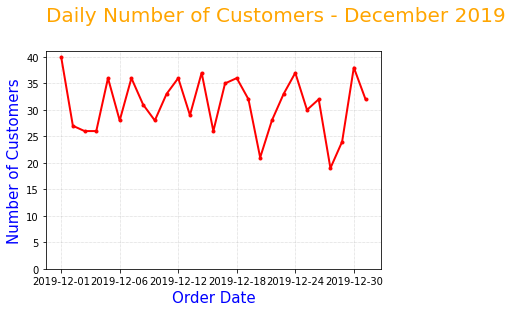

In [ ]:
#Import Library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

#Load Data
df = pd.read_csv('retail_raw_reduced.csv')

#Membuat kolom order_month
df['order_month'] = df['order_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))

#Membuat kolom GMV
df['gmv'] = df['item_price'] * df['quantity']

#Plot grafik

df[df['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

#Membuat Multi Line Chart

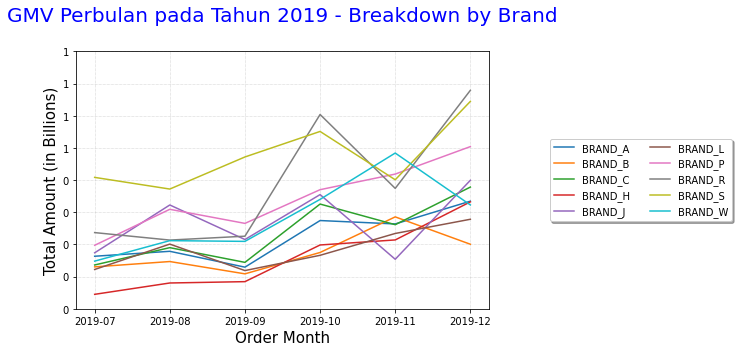

In [3]:
#Import library

import datetime
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_csv('retail_raw_reduced.csv')

#Membuat kolom baru yang memiliki tipe data datetime dalam format '%Y-%m
df['order_month'] = df['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

#Membuat kolom GMV
df['gmv'] = df['item_price'] * df['quantity']

#Membuat Multi-Line Chart
df.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('GMV Perbulan pada Tahun 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2) #Customisasi legend
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

Keterangan:
1. **.gcf()** : get the current figure
2. **loc** untuk menentukan posisi legend, 'upper left', 'upper right', 'lower left', 'lower right', 'upper center', 'lower center', 'center left', 'center right', 'center', 'best' (memilih tempat yang tidak overlap dengan grafik)
3. **bbox_to_anchor** untuk mengatur lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa berisi 4 angka, angka ketiga dan keempat menyatakan width(lebar) dan height(tinggi) dari legend.
4. **shadow** jika diisi True, maka kotak legend akan memiliki bayangan
5. **ncol** yaitu jumlah kolom dari isi legend, defaultnya adalah 1
6. **fontsize** adalah ukuran huruf pada legend
7. **title** memberikan judul pada legend
8. **title_fontsize** ukuran huruf pada judul legend

#Custom Colormap

<Figure size 432x288 with 0 Axes>

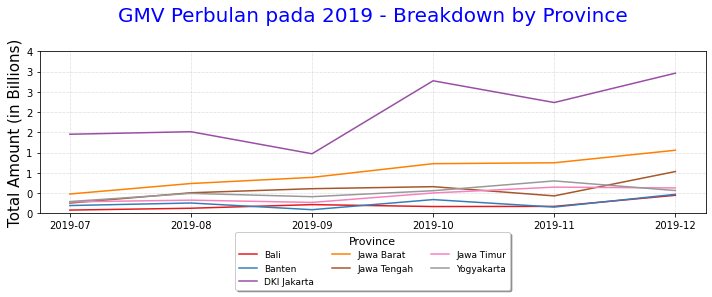

In [5]:
#Import library
import matplotlib.pyplot as plt
plt.clf()

#Membuat visualisasi
df.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('GMV Perbulan pada 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Keterangan:
1. **.clf()** adalah clean the current figure
2. **cmap** merupakan kumpulan palet warna

#Membuat Line Chart GMV Breakdown by Top Provinces

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


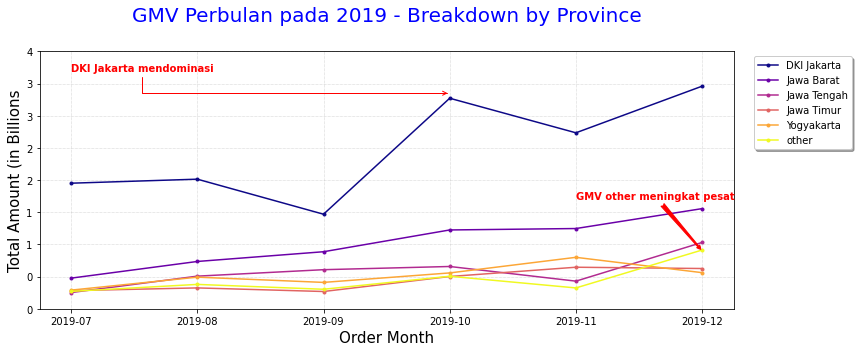

In [8]:
#Membuat variabel untuk 5 provinsi dengan GMV tertinggi
top_provinces = (df.groupby('province')['gmv']
                 .sum()
                 .reset_index()
                 .sort_values(by='gmv',ascending=False)
                 .head())
print(top_provinces)

#Membuat kolom di dataset dengan nama province_top
df['province_top'] = df['province'].apply(lambda x:x if (x in top_provinces['province'].to_list()) else 'other')

#Memplot multi-line chart
import matplotlib.pyplot as plt
df.groupby(['order_month','province_top'])['gmv'].sum().unstack(). plot(marker='.', cmap='plasma')
plt.title('GMV Perbulan pada 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

#Membuat Anotasi
#Anotasi Pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
             xytext=(4, 1700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
                              connectionstyle='arc3',
                              color='red'))
#Anotasi Kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
             xytext=(0, 3700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='angle',
                             color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

Keterangan:
1. **xytext** merupakan koordinat dari teks. Jika tidak diisi, maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
2. **arrowprops** merupakan konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary.
* **arrowstyle**: menentukan bentuk dari panah penunjuk. Isinya dapat berupa bentuk '->', '-|>', '<->', '-[', 'fancy', 'simple', 'wedge', etc.
* **connectionstyle** untuk menentukan bentuk dari garis panahnya. Nilai yang dapat digunakan antara lain 'arc', 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali. 
* **color** menentukan warna dari panah. 



#Membuat Subset dari Data

In [10]:
df_dki_q4 = df[(df['province']=='DKI Jakarta') & (df['order_month'] >= '2019-10')]
print(df_dki_q4.head())

   order_id  order_date  customer_id  ... order_month      gmv province_top
0   1703458  2019-10-17        14004  ...     2019-10  7400000  DKI Jakarta
1   1706815  2019-10-24        17220  ...     2019-10  1208000  DKI Jakarta
2   1710718  2019-11-03        16518  ...     2019-11  8360000  DKI Jakarta
4   1702573  2019-10-16        15696  ...     2019-10  8950000  DKI Jakarta
6   1711399  2019-11-04        16791  ...     2019-11  1465000  DKI Jakarta

[5 rows x 12 columns]


#Membuat Pie Chart

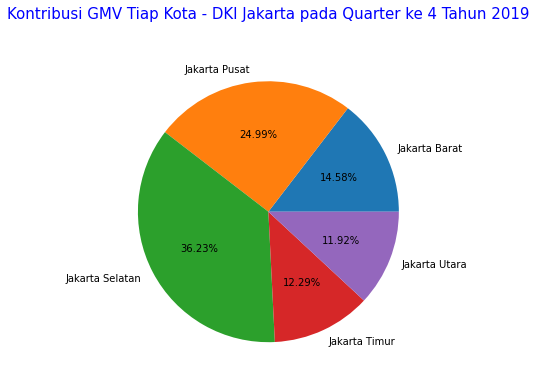

In [11]:
import matplotlib.pyplot as plt
gmv_per_city_dki_q4 = df_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('Kontribusi GMV Tiap Kota - DKI Jakarta pada Quarter ke 4 Tahun 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

Keterangan
1. **labels** merupakan array yang berisikan label/tulisan yang ditujukkan untuk masing-masing bagian pie.
2. **colors** merupakan array yang berisikan warna untuk masing-masing bagian pie
3. **autopct** adalah format untuk nilai persentase yang ditampilkan, bisa berupa string atau function
4. **shadow** jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False
5. **radius** adalah jari-jari dari pie chart

#Membuat Bar Chart

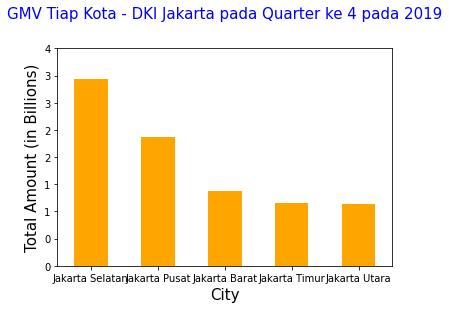

In [18]:
#import library
import matplotlib.pyplot as plt
plt.clf()

#Memvisualisasikan menggunakan bar chart
df_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('GMV Tiap Kota - DKI Jakarta pada Quarter ke 4 pada 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

#Membuat Multi-Bar Chart

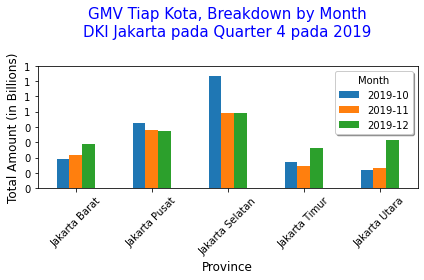

In [20]:
#import library
import matplotlib.pyplot as plt

#Membuat visualisasi multi-bar chart
df_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Tiap Kota, Breakdown by Month\nDKI Jakarta pada Quarter 4 pada 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Membuat Stacked Chart

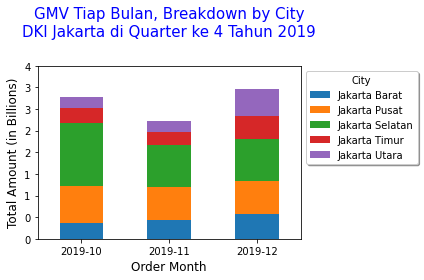

In [21]:
#import library
import matplotlib.pyplot as plt

#Memvisualisasikan Stacked Chart
df_dki_q4.groupby(['order_month', 'city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Tiap Bulan, Breakdown by City\nDKI Jakarta di Quarter ke 4 Tahun 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Membuat Agregat Data Customer

In [22]:
data_per_cust = (df_dki_q4.groupby('customer_id')
                          .agg({'order_id':'nunique',
                                'quantity':'sum',
                                'gmv':'sum'})
                          .reset_index()
                          .rename(columns={'order_id':'orders'}))
print(data_per_cust.sort_values(by='orders', ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


Customer dengan id 12748 telah melakukan 29 pemesanan, bisa dikatakan bahwa customer tersebut cukup loyal.

#Membuat Histogram - Part 1

<Figure size 432x288 with 0 Axes>

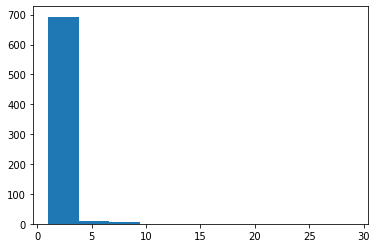

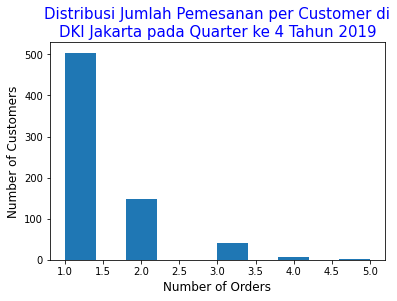

In [23]:
#import library
import matplotlib.pyplot as plt
plt.clf()
#Histogram pertama
plt.figure()
plt.hist(data_per_cust['orders'])
plt.show()
#Histogram kedua
plt.figure()
plt.hist(data_per_cust['orders'], range=(1,5))
plt.title('Distribusi Jumlah Pemesanan per Customer di\nDKI Jakarta pada Quarter ke 4 Tahun 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

#Membuat Histogram - Part 2

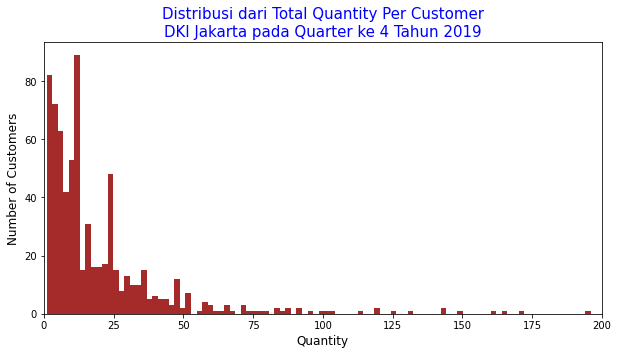

In [24]:
#import library
import matplotlib.pyplot as plt

#Memvisualisasikan menggunakan histogram
plt.figure(figsize=(10,5))
plt.hist(data_per_cust['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribusi dari Total Quantity Per Customer\nDKI Jakarta pada Quarter ke 4 Tahun 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize= 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

#Membuat Histogram - Part 3

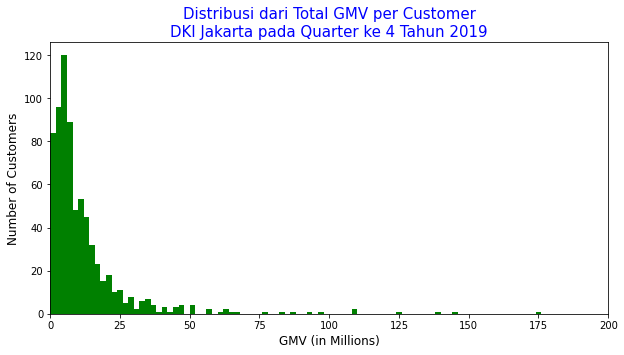

In [25]:
#mengimpor library
import matplotlib.pyplot as plt

#memvisualisasikan menggunakan histogram
plt.figure(figsize=(10,5))
plt.hist(data_per_cust['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribusi dari Total GMV per Customer\nDKI Jakarta pada Quarter ke 4 Tahun 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

Keterangan:
1. **bins**: jumlah bin (kelompok nilai) yang diinginkan
2. **range**: nilai minimum dan maksimum yang ditampilkan
3. **orientation**: 'horizontal' atau 'vertikal'
4. **color**: warna bar di histogram

#Membuat Scatterplot

<Figure size 432x288 with 0 Axes>

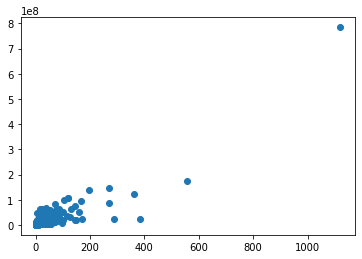

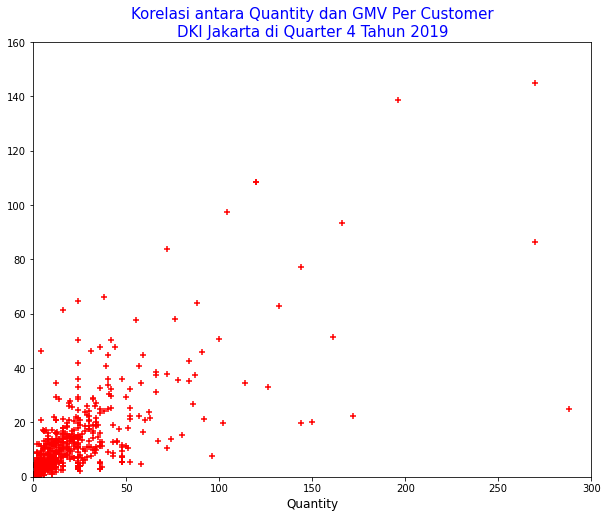

In [27]:
#Mengimpor library
import matplotlib.pyplot as plt
plt.clf()

#Memvisualisasikan dalam bentuk scatterplot
#Scatterplot pertama
plt.figure()
plt.scatter(data_per_cust['quantity'], data_per_cust['gmv'])
plt.show()
#Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_cust['quantity'], data_per_cust['gmv'], marker='+', color='red')
plt.title('Korelasi antara Quantity dan GMV Per Customer\nDKI Jakarta di Quarter 4 Tahun 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

#Study Case: Menentukan 5 top brand

In [28]:
#Mengambil informasi top 5 brands berdasarkan quantity
top_brands=(df[df['order_month']=='2019-12'].groupby('brand')['quantity']
                                .sum()
                                .reset_index()
                                .sort_values(by='quantity', ascending=False)
                                .head(5))

#Membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya 5 top brands
data_top5brand_dec = df[(df['order_month']=='2019-12') & (df['brand'].isin(top_brands['brand'].to_list()))]

print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


#Study Case: Multi-Line chart Daily Quantity untuk 5 top brand

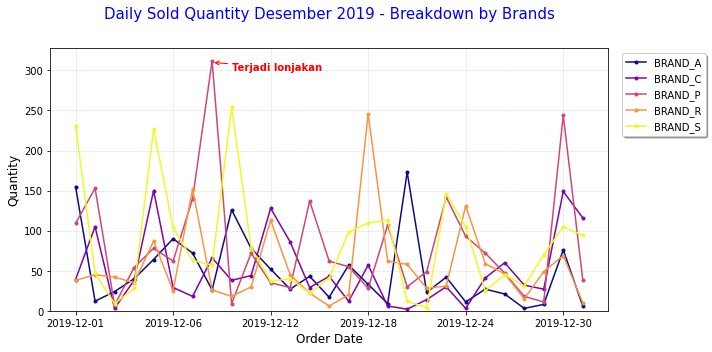

In [30]:
#import library
import matplotlib.pyplot as plt

#Memvisualisasikan
data_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Desember 2019 - Breakdown by Brands', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7,310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3',
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#Study Case: Kuantitas Penjualan 5 Top Brand selama Desember 2019

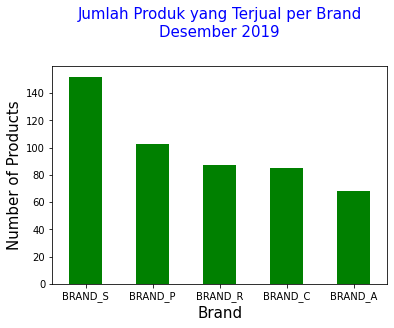

In [31]:
#Import library
import matplotlib.pyplot as plt

#Memvisualisasikan
plt.clf()
data_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Jumlah Produk yang Terjual per Brand\nDesember 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products', fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

#Study Case: Penjualan Produk Diatas 100 dan Dibawah 100 selama Desember 2019

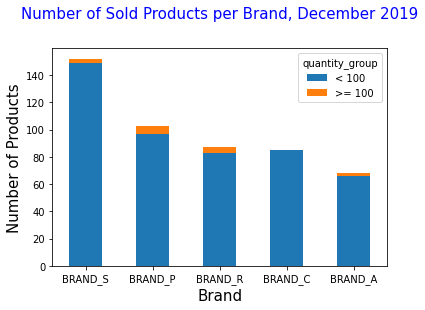

In [34]:
#import library
import matplotlib.pyplot as plt

#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
data_top5brand_dec_per_product = data_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
data_top5brand_dec_per_product['quantity_group'] = data_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
data_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = data_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
data_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

#Study Case: Murah atau Mahalkah Harga Produk 5 Tob Brand

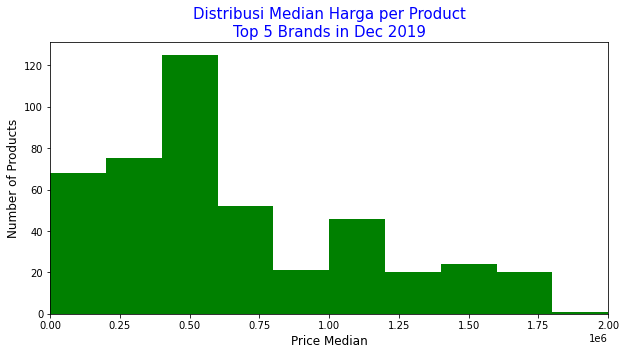

In [35]:
#import library

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(data_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribusi Median Harga per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

#Study Case: Korelasi quantity vs GMV

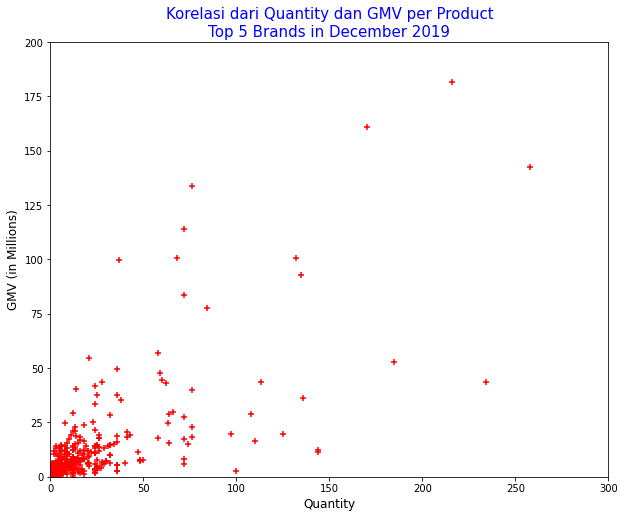

In [37]:
#import library
import matplotlib.pyplot as plt

#agregat per product
data_per_product_top5brand_dec = data_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Korelasi dari Quantity dan GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

#Study Case: Korelasi Median Harga vs Quantity

<Figure size 432x288 with 0 Axes>

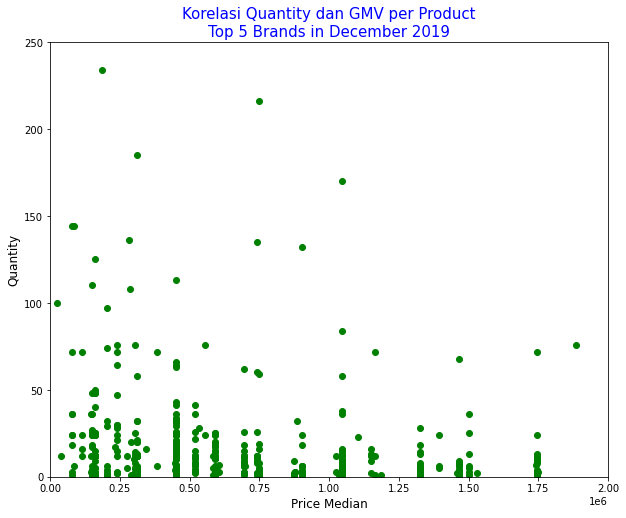

In [39]:
#Import library
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = data_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Korelasi Quantity dan GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()